# Import Required libraries



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
pd.DataFrame({"Features_names" : dataset.columns, "No.of Null values" : dataset.isnull().sum() , "% of null values" : (dataset.isnull().sum()/len(dataset))*100} )

,Features_names,No.of Null values,% of null values
Item_Identifier,Item_Identifier,0,0.000000
Item_Weight,Item_Weight,1463,17.165317
Item_Fat_Content,Item_Fat_Content,0,0.000000
Item_Visibility,Item_Visibility,0,0.000000
Item_Type,Item_Type,0,0.000000
Item_MRP,Item_MRP,0,0.000000
Outlet_Identifier,Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,Outlet_Establishment_Year,0,0.000000
Outlet_Size,Outlet_Size,2410,28.276428
Outlet_Location_Type,Outlet_Location_Type,0,0.000000


In [7]:
dataset["Item_Weight"] = dataset["Item_Weight"].fillna(dataset["Item_Weight"].median())

In [8]:
dataset.drop(["Outlet_Size"] , inplace = True , axis = 1)

In [9]:
pd.DataFrame({"Features_names" : dataset.columns, "No.of Null values" : dataset.isnull().sum() , "% of null values" : (dataset.isnull().sum()/len(dataset))*100} )

,Features_names,No.of Null values,% of null values
Item_Identifier,Item_Identifier,0,0.0
Item_Weight,Item_Weight,0,0.0
Item_Fat_Content,Item_Fat_Content,0,0.0
Item_Visibility,Item_Visibility,0,0.0
Item_Type,Item_Type,0,0.0
Item_MRP,Item_MRP,0,0.0
Outlet_Identifier,Outlet_Identifier,0,0.0
Outlet_Establishment_Year,Outlet_Establishment_Year,0,0.0
Outlet_Location_Type,Outlet_Location_Type,0,0.0
Outlet_Type,Outlet_Type,0,0.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [11]:
dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "low fat"] = "Low Fat"
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "LF"] = "Low Fat"
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "reg"] = "Low Fat"

In [13]:
dataset["Item_Fat_Content"] = pd.get_dummies(dataset["Item_Fat_Content"], drop_first=True ,dtype='int' )

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 699.3+ KB


In [15]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [16]:
dataset["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:

dataset["Item_Type"] = dataset["Item_Type"].astype('category').cat.codes


In [18]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [19]:
dataset['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
import re
dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].str.extract(r'(\d+)').astype('int')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int8   
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int32  
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(1), int8(1), object(3)
memory usage: 607.7+ KB


In [29]:
dataset["Outlet_Type"].unique()

array([1, 2, 0, 3], dtype=int8)

In [27]:
dataset["Outlet_Type"] = dataset["Outlet_Type"].astype('category').cat.codes

In [28]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,3,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,OUT010,1998,3,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,1987,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,3,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,2,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,3,2,1845.5976


In [ ]:
dataset

In [53]:
# = ["Item_Identifier" ,"Outlet_Type" ,"Item_Type","Outlet_Identifier" ,"Outlet_Establishment_Year"]

In [30]:

drop = ["Item_Identifier" ,"Outlet_Identifier"]

dataset.drop(drop,axis = 1 , inplace = True)

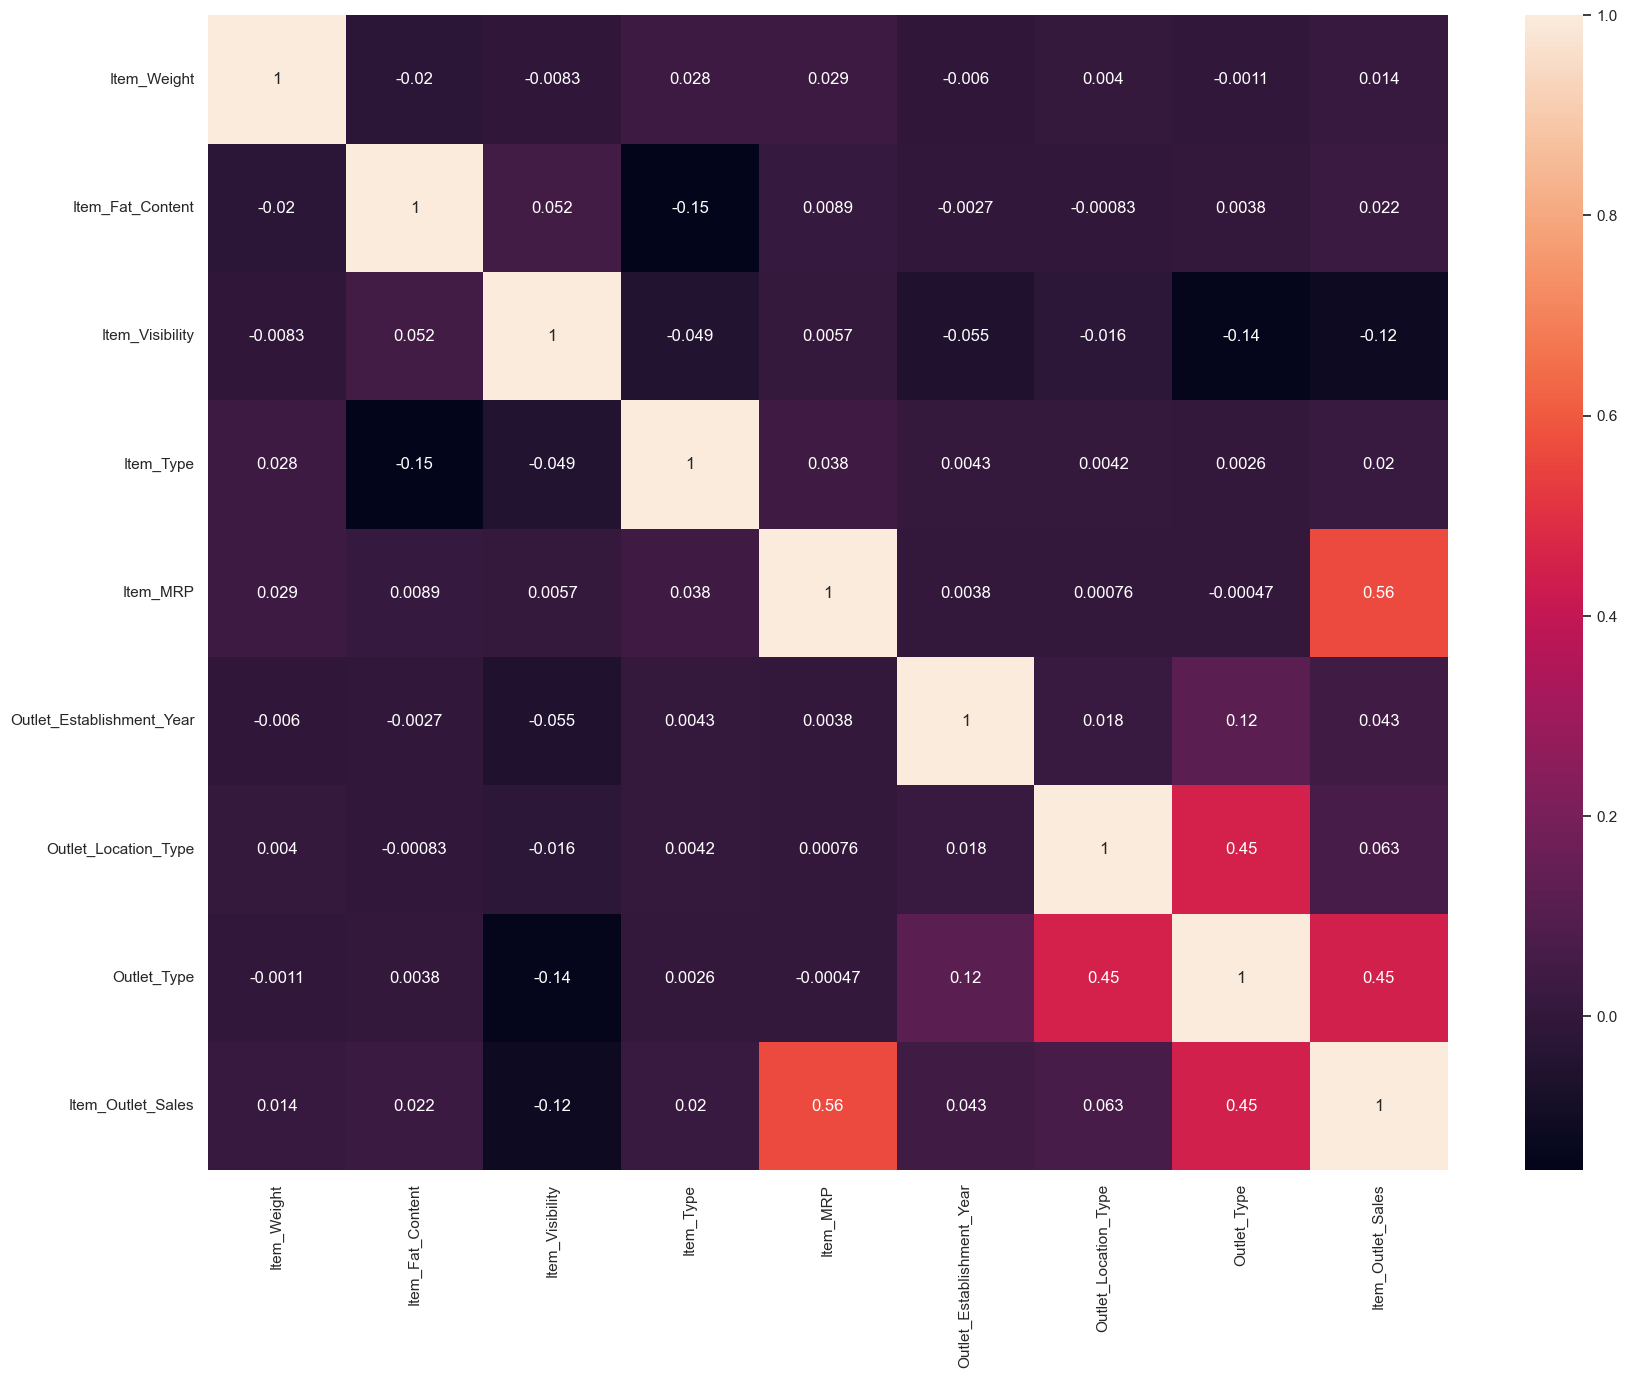

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.select_dtypes(exclude = 'object').corr(method = 'spearman') ,  annot=True)
plt.show()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
 
vif['vif'] = [variance_inflation_factor(dataset,i) for i in range(dataset.shape[1])]
vif['columns'] = dataset.columns

vif

,vif,columns
0,10.209758,Item_Weight
1,1.547017,Item_Fat_Content
2,2.756738,Item_Visibility
3,4.033815,Item_Type
4,10.095772,Item_MRP
5,27.596722,Outlet_Establishment_Year
6,10.191388,Outlet_Location_Type
7,5.659940,Outlet_Type
8,5.266690,Item_Outlet_Sales


In [44]:
dataset.drop(["Outlet_Establishment_Year"] , axis = 1 , inplace=True)

vif = pd.DataFrame()
 
vif['vif'] = [variance_inflation_factor(dataset,i) for i in range(dataset.shape[1])]
vif['columns'] = dataset.columns

vif

,vif,columns
0,6.958846,Item_Weight
1,1.498561,Item_Fat_Content
2,2.545037,Item_Visibility
3,3.603911,Item_Type
4,8.740517,Item_MRP
5,8.817184,Outlet_Location_Type
6,5.540446,Outlet_Type
7,5.234902,Item_Outlet_Sales


In [40]:
dataset

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,3,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,3,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,3,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,3,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,3,2,1845.5976


In [45]:
x = dataset.drop(["Item_Outlet_Sales"] , axis = 1)
y = dataset["Item_Outlet_Sales"]

In [46]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf


ols = smf.OLS(y , exog = x).fit()


ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              5147.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                        0.00
Time:                        16:13:46   Log-Likelihood:                         -72513.
No. Observations:                8514   AIC:                                  1.450e+05
Df Residuals:                    8507   BIC:                                  1.451e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Item_Weight            -13.4907      2.559     -5.271      0.000     -18.508      -8.474
Item_Fat_Content        27.0989     27.577      0.983      0.326     -26.958      81.156
Item_Visibility      -2364.7644    248.033     -9.534      0.000   -2850.970   -1878.559
Item_Type               -8.6310      2.975     -2.901      0.004     -14.463      -2.799
Item_MRP                14.9203      0.193     77.407      0.000      14.543      15.298
Outlet_Location_Type  -311.6340     16.870    -18.473      0.000    -344.703    -278.565
Outlet_Type            947.3605     18.808     50.370      0.000     910.492     984.229
==============================================================================
Omnibus:                      910.170   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.344
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.824   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
x= dataset[["Item_Visibility","Item_MRP" , "Outlet_Location_Type" ]]
x

,Item_Visibility,Item_MRP,Outlet_Location_Type
0,0.016047,249.8092,Tier 1
1,0.019278,48.2692,Tier 3
2,0.016760,141.6180,Tier 1
3,0.000000,182.0950,Tier 3
4,0.000000,53.8614,Tier 3
...,...,...,...
8518,0.056783,214.5218,Tier 3
8519,0.046982,108.1570,Tier 2
8520,0.035186,85.1224,Tier 2
8521,0.145221,103.1332,Tier 3


In [59]:
import re
x['Outlet_Location_Type'] = x['Outlet_Location_Type'].str.extract(r'(\d+)').astype('int')
x

,Item_Visibility,Item_MRP,Outlet_Location_Type
0,0.016047,249.8092,1
1,0.019278,48.2692,3
2,0.016760,141.6180,1
3,0.000000,182.0950,3
4,0.000000,53.8614,3
...,...,...,...
8518,0.056783,214.5218,3
8519,0.046982,108.1570,2
8520,0.035186,85.1224,2
8521,0.145221,103.1332,3


In [60]:
x 

,Item_Visibility,Item_MRP,Outlet_Location_Type
0,0.016047,249.8092,1
1,0.019278,48.2692,3
2,0.016760,141.6180,1
3,0.000000,182.0950,3
4,0.000000,53.8614,3
...,...,...,...
8518,0.056783,214.5218,3
8519,0.046982,108.1570,2
8520,0.035186,85.1224,2
8521,0.145221,103.1332,3


In [31]:
less_p_values = [ 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods']

x.drop(less_p_values , axis =1 , inplace = True)

KeyError: "['Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'] not found in axis"

In [61]:
x.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Location_Type'], dtype='object')

In [62]:

vif = pd.DataFrame()
 
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['columns'] = x.columns

vif

,vif,columns
0,2.313644,Item_Visibility
1,3.991724,Item_MRP
2,4.100360,Outlet_Location_Type


In [ ]:
vif_greater_than_5 = ["Item_Weight"]

x.drop(vif_greater_than_5 , axis = 1 , inplace = True )

In [ ]:
vif = pd.DataFrame()
 
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['columns'] = x.columns

vif

In [63]:

ols = smf.OLS(y , exog = x).fit()


ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              8590.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:48:32   Log-Likelihood:                         -73716.
No. Observations:                8523   AIC:                                  1.474e+05
Df Residuals:                    8520   BIC:                                  1.475e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Item_Visibility      -4358.3142    271.214    -16.070      0.000   -4889.959   -3826.669
Item_MRP                15.2598      0.194     78.714      0.000      14.880      15.640
Outlet_Location_Type   154.2520     13.378     11.530      0.000     128.028     180.476
==============================================================================
Omnibus:                      775.563   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1583.851
Skew:                           0.597   Prob(JB):                         0.00
Kurtosis:                       4.741   Cond. No.                     2.80e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

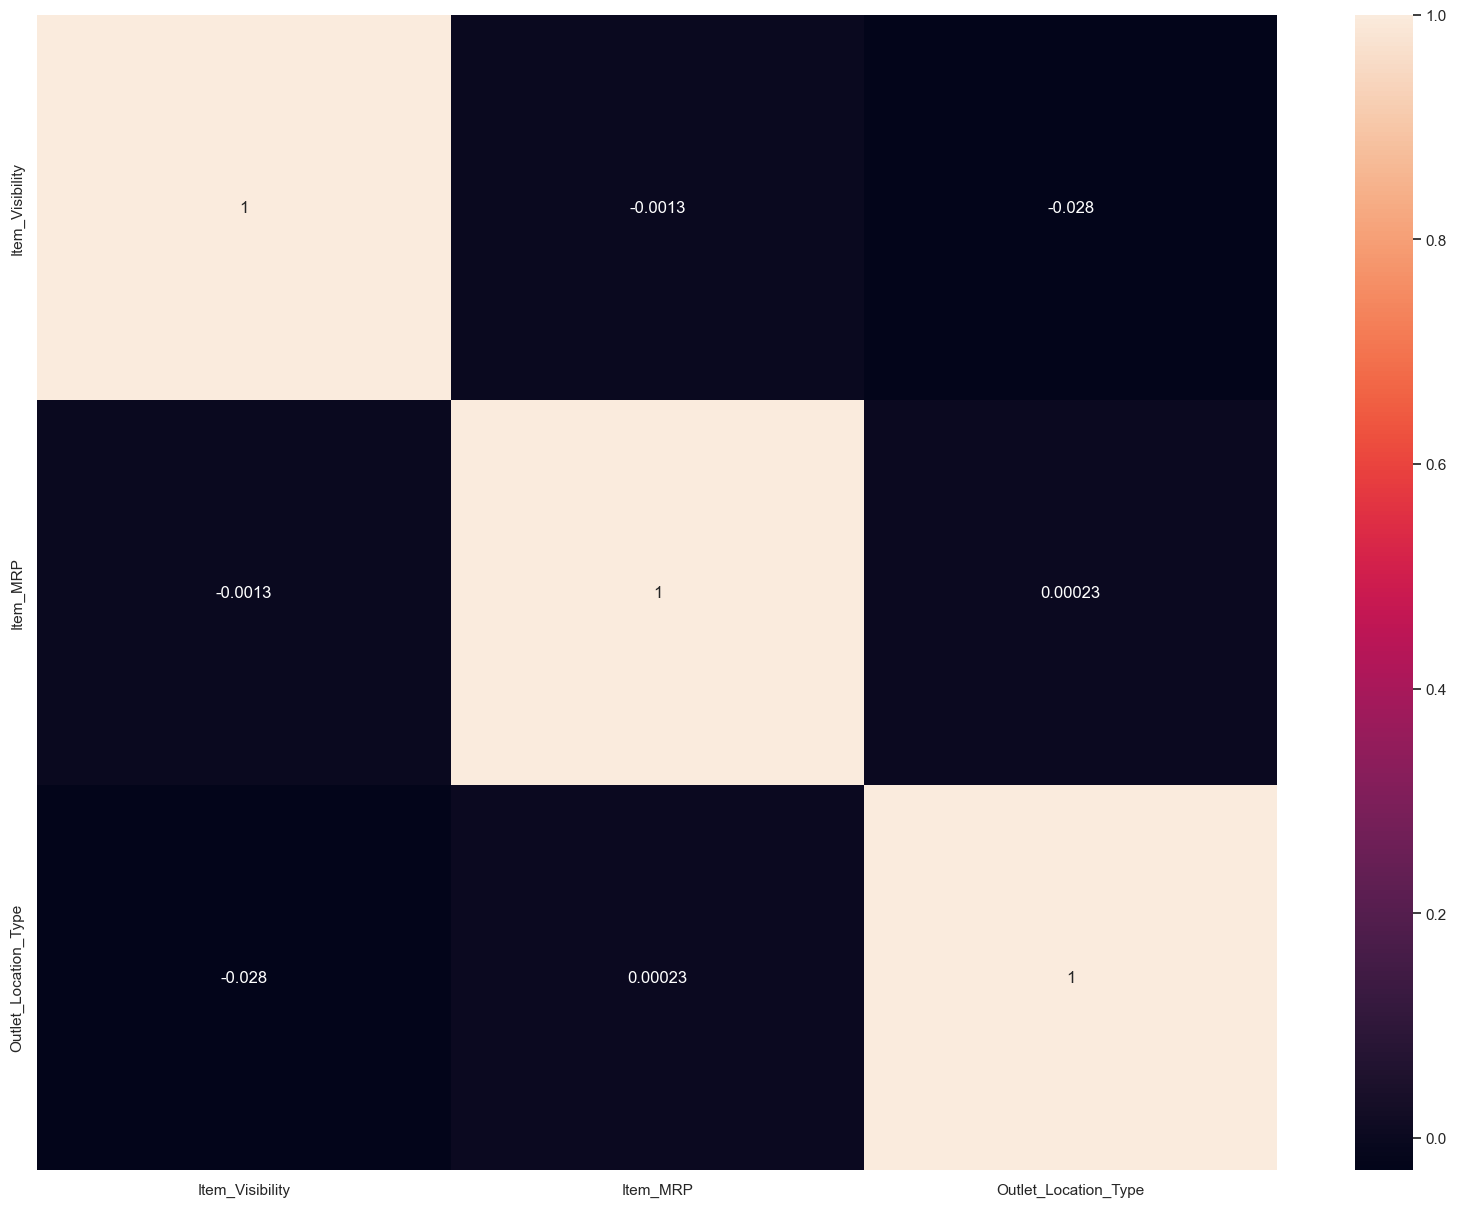

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr() ,  annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x,columns = x.columns)
sc_x

In [47]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=43)

In [48]:
x_train.shape , y_train.shape

((6811, 7), (6811,))

In [49]:
x_test.shape , y_test.shape

((1703, 7), (1703,))

In [50]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(x_train , y_train)

LinearRegression()

In [51]:
lr.coef_

array([ 9.78668796e-02,  5.60378477e+01, -2.03917937e+03, -1.14795194e+00,
        1.54134429e+01, -2.68144422e+02,  9.71556974e+02])

In [52]:
from sklearn.metrics import r2_score , mean_squared_error

lr_predict_train = lr.predict(x_train)
lr_predict_test = lr.predict(x_test)


print("train :" , r2_score(y_train , lr_predict_train))

print("Test : " , r2_score(y_test ,lr_predict_test))

print()

print("mean_squared_error : " , mean_squared_error(y_test ,lr_predict_test))


train : 0.4978446693195706

Test :  0.507622010970525
Test :  1497852.331734755


# Regularization

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.3)

ridge.fit(x_train , y_train)

Ridge(alpha=0.3)

In [54]:
ridge.coef_

array([ 1.06215197e-01,  5.58844592e+01, -2.00482861e+03, -1.13602435e+00,
        1.54134251e+01, -2.68224409e+02,  9.71927874e+02])

In [55]:
y_pred_ridge_train=ridge.predict(x_train)
y_pred_ridge_test= ridge.predict(x_test)

print("ridge Train :" , r2_score(y_train , y_pred_ridge_train))
print("ridge Test :" , r2_score(y_test , y_pred_ridge_test))

ridge Train : 0.4978436187627441
ridge Test : 0.5076941550511953


In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
print("Lasso Regularization", lasso.coef_)

y_pred_lasso_train= lasso.predict(x_train)
y_pred_lasso_test= lasso.predict(x_test)

print("Lasso Train :" , r2_score(y_train , y_pred_lasso_train))
print("Lasso Test :" , r2_score(y_test , y_pred_lasso_test))


Lasso Regularization [ 9.98297340e-02  5.54326376e+01 -2.00053493e+03 -1.13572787e+00
  1.54133930e+01 -2.68019261e+02  9.71793643e+02]
Lasso Train : 0.4978433061766424
Lasso Test : 0.5077048492329144


In [75]:
#!pip install XGboost

In [57]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgboost_train= xgboost.predict(x_train)
y_pred_xgboost_test= xgboost.predict(x_test)

print("xgboost Train :" , r2_score(y_train , y_pred_xgboost_train))
print("xgboost Test :" , r2_score(y_test , y_pred_xgboost_test))


xgboost Train : 0.8412710761556198
xgboost Test : 0.5104729909006922


In [59]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(x_train , y_train)



SGDRegressor()

In [60]:
y_pred_sgd_train= sgd.predict(x_train)
y_pred_sgd_test= sgd.predict(x_test)

print("sgd Train :" , r2_score(y_train , y_pred_sgd_train))
print("sgd Test :" , r2_score(y_test , y_pred_sgd_test))

sgd Train : -4.1482190201276424e+19
sgd Test : -3.879695804889064e+19


In [72]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(criterion="friedman_mse")
random.fit(x_train , y_train)

y_pred_random_train= random.predict(x_train)
y_pred_random_test= random.predict(x_test)

print("random Train :" , r2_score(y_train , y_pred_random_train))
print("random Test :" , r2_score(y_test , y_pred_random_test))

random Train : 0.9352498318220022
random Test : 0.5464761063008375


In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred_dt_train= dt.predict(x_train)
y_pred_dt_test= dt.predict(x_test)

print("dt Train :" , r2_score(y_train , y_pred_dt_train))
print("dt Test :" , r2_score(y_test , y_pred_dt_test))

dt Train : 1.0
dt Test : 0.19801341426248553


In [63]:
from sklearn.svm import SVR

svm = SVR(kernel="poly")
svm.fit(x_train , y_train)

y_pred_svm_train= svm.predict(x_train)
y_pred_svm_test= svm.predict(x_test)

print("svm Train :" , r2_score(y_train , y_pred_svm_train))
print("svm Test :" , r2_score(y_test , y_pred_svm_test))

svm Train : 0.2538102878475126
svm Test : 0.29629380685081863
